<a href="https://colab.research.google.com/github/fedhere/MLPNS_FBianco/blob/main/viz/Anscombe's_Quartet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: FBB

### This is a demo of the famous Anscombe's Quartet 
### developed BY Federica B Bianco, NYU @fedhere 
### for CUSP Principle of Urban Informatics. 

## The moral of the story is: look at your data!
### version 1: August 2015 
### last update: October 2021


In [ ]:
import os
import sys
import numpy as np
import pylab as pl
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### lets read in a file which is not a regular csv file, called anscombe.txt, but let's use the pandas moduleand its read_csv function

In [ ]:
import pandas as pd
if not os.path.isfile("anscombe.txt"):
    !curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt
pd.read_csv("anscombe.txt")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   651  100   651    0     0   3636      0 --:--:-- --:--:-- --:--:--  3636


,Anscombe's Quartet
0,Anscombe-Data-Set I I II II III III IV IV
1,X Y X Y X Y X Y
2,10 8.04 10 9.14 10 7.46 8 6.58
3,8 6.95 8 8.14 8 6.77 8 5.76
4,13 7.58 13 8.74 13 12.74 8 7.71
5,9 8.81 9 8.77 9 7.11 8 8.84
6,11 8.33 11 9.26 11 7.81 8 8.47
7,14 9.96 14 8.1 14 8.84 8 7.04
8,6 7.24 6 6.13 6 6.08 8 5.25
9,4 4.26 4 3.1 4 5.39 19 12.5


notice that I used the link to github starting with raw: https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt. The page https://github.com/fedhere/UInotebooks/blob/master/anscombe.txt is an html file hosting the text for rendering. Downloading that would download an html file. Try it. 

## pandas organizes datasets in "data frames"

## lets read the file a little better by identifying what to use as header to name our variables

In [ ]:
pd.read_csv("anscombe.txt", header = [1, 2], delimiter=' ')

Anscombe-Data-Set       I  ... Unnamed: 9_level_0 Unnamed: 10_level_0
   Unnamed: 0_level_1       X  ... Unnamed: 9_level_1 Unnamed: 10_level_1
0                 NaN  10.000  ...                NaN                 NaN
1                 NaN   8.000  ...                NaN                 NaN
2                 NaN  13.000  ...                NaN                 NaN
3                 NaN   9.000  ...                NaN                 NaN
4                 NaN  11.000  ...                NaN                 NaN
5                 NaN  14.000  ...                NaN                 NaN
6                 NaN   6.000  ...                NaN                 NaN
7                 NaN   4.000  ...                NaN                 NaN
8                 NaN  12.000  ...                NaN                 NaN
9                 NaN   7.000  ...                NaN                 NaN
10                NaN   5.000  ...                NaN                 NaN
11                NaN     NaN  ...                NaN                 NaN
12                NaN   9.000  ...               Mean                 NaN
13                NaN     NaN  ...                NaN                 NaN
14                NaN  10.000  ...           Variance        (Population)
15                NaN     NaN  ...                NaN                 NaN
16                NaN   0.816  ...        Correlation           (Pearson)

[17 rows x 11 columns]

## lets read the file a little better yet by only reading the rows we want 

In [ ]:
pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')

Anscombe-Data-Set   I         ...     IV Unnamed: 9_level_0 Unnamed: 10_level_0
   Unnamed: 0_level_1   X      Y  ...      Y Unnamed: 9_level_1 Unnamed: 10_level_1
0                 NaN  10   8.04  ...   6.58                NaN                 NaN
1                 NaN   8   6.95  ...   5.76                NaN                 NaN
2                 NaN  13   7.58  ...   7.71                NaN                 NaN
3                 NaN   9   8.81  ...   8.84                NaN                 NaN
4                 NaN  11   8.33  ...   8.47                NaN                 NaN
5                 NaN  14   9.96  ...   7.04                NaN                 NaN
6                 NaN   6   7.24  ...   5.25                NaN                 NaN
7                 NaN   4   4.26  ...  12.50                NaN                 NaN
8                 NaN  12  10.84  ...   5.56                NaN                 NaN
9                 NaN   7   4.82  ...   7.91                NaN                 NaN
10                NaN   5   5.68  ...   6.89                NaN                 NaN

[11 rows x 11 columns]

## if we are happy lets save the data frame read by pandas
### (we could drop the columns we do not need after that, but I'm not gonna bother)

In [ ]:
ansc = pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')
#fig=pl.figure(figsize=(10,10))

ansc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   (Anscombe-Data-Set, Unnamed: 0_level_1)     0 non-null      float64
 1   (I, X)                                      11 non-null     int64  
 2   (I, Y)                                      11 non-null     float64
 3   (II, X)                                     11 non-null     int64  
 4   (II, Y)                                     11 non-null     float64
 5   (III, X)                                    11 non-null     int64  
 6   (III, Y)                                    11 non-null     float64
 7   (IV, X)                                     11 non-null     int64  
 8   (IV, Y)                                     11 non-null     float64
 9   (Unnamed: 9_level_0, Unnamed: 9_level_1)    0 non-null      float64
 10  (Unnamed: 10_lev

## The dataframe is a class. In this case the class hosts 4 datasets: I,II,III,IV. We can think of the dataframe as a python dictionary as well. 
## If we think of it as a class lets refer to the first dataset identified as I as ansc.I
## Otherwise I can refer to it as a dictionary as ansc[I]

this structure propagates downward to elements of ansc.I too!

In [ ]:
print (ansc.I)

     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


In [ ]:
print (ansc['I'])

     X      Y
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


In [ ]:
ansc.describe()


Anscombe-Data-Set          I  ... Unnamed: 9_level_0 Unnamed: 10_level_0
      Unnamed: 0_level_1          X  ... Unnamed: 9_level_1 Unnamed: 10_level_1
count                0.0  11.000000  ...                0.0                 0.0
mean                 NaN   9.000000  ...                NaN                 NaN
std                  NaN   3.316625  ...                NaN                 NaN
min                  NaN   4.000000  ...                NaN                 NaN
25%                  NaN   6.500000  ...                NaN                 NaN
50%                  NaN   9.000000  ...                NaN                 NaN
75%                  NaN  11.500000  ...                NaN                 NaN
max                  NaN  14.000000  ...                NaN                 NaN

[8 rows x 11 columns]

# Lets Look at the first and second moment: mean and standard deviation

In [ ]:
print("Distribution Means:               {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()))
print("Distribution Standard Deviations: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()))


Distribution Means:               7.50, 7.50, 7.50, 7.50
Distribution Standard Deviations: 2.03, 2.03, 2.03, 2.03


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


Text(0.5, 0.75, 'standard deviation')

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


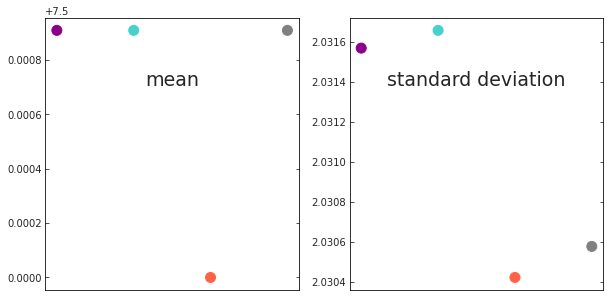

In [ ]:
fig = pl.figure(figsize=(10, 5))
ax = [0] * 2

ax[0] = fig.add_subplot(121)
ax[1] = fig.add_subplot(122)
colors=['DarkMagenta', 'MediumTurquoise', 'tomato', 'gray']
for i in range(2):
    ax[i].set_xticks([],[])
ax[0].scatter(range(4), [ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()], 
              s = 100, c = colors)
ax[0].text(0.5, 0.75, 'mean', horizontalalignment = "center", 
           transform = ax[0].transAxes, fontsize = 19)
ax[1].scatter(range(4), [ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()], 
              s = 100, c = colors)
ax[1].text(0.5, 0.75, 'standard deviation', horizontalalignment = "center", 
           transform = ax[1].transAxes, fontsize = 19)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  after removing the cwd from sys.path.


<ErrorbarContainer object of 3 artists>

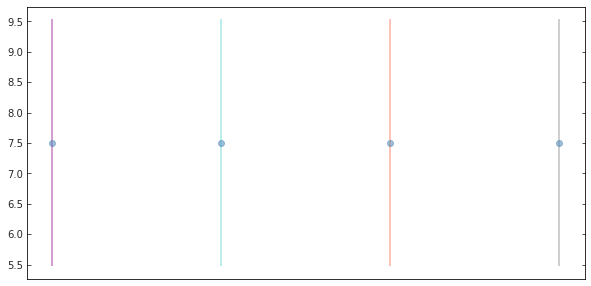

In [ ]:
ax = pl.figure(figsize=(10, 5)).add_subplot(111) 

colors=['DarkMagenta', 'MediumTurquoise', 'tomato', 'gray']
ax.set_xticks([],[])
ax.errorbar(range(4), [ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()], 
            yerr = [ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()], 
            label= ['mean I', 'mean II', 'mean II', 'mean VI'], alpha=0.5, ecolor = colors, 
            fmt='o', )


# cool! they are identical! identical mean, identical standard deviation
# hence we are looking at the same distribution i guess. 

## let's fit a line to it

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


lregmodels={}
pregmodels={}
for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #create x^2 column
    a['X2'] = a.X**2
    rm = sm.OLS(a.Y, sm.add_constant(a.X))
    lregmodels[i] = rm.fit()
    
    pregmodels[i] = smf.ols(formula='Y ~ X2 + X', data = a).fit()
    
    print ("linear regression slope {}".format(lregmodels[i].params))
    print ("polynomial regression slope {}".format(pregmodels[i].params))    

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


linear regression slope const    3.000091
X        0.500091
dtype: float64
polynomial regression slope Intercept    0.755068
X2          -0.031620
X            1.069252
dtype: float64
linear regression slope const    3.000909
X        0.500000
dtype: float64
polynomial regression slope Intercept   -5.995734
X2          -0.126713
X            2.780839
dtype: float64
linear regression slope const    3.002455
X        0.499727
dtype: float64
polynomial regression slope Intercept    5.111767
X2           0.029709
X           -0.035028
dtype: float64
linear regression slope const    3.001727
X        0.499909
dtype: float64
polynomial regression slope Intercept    0.178018
X2          -0.018577
X            1.001489
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


## the linear regression slopes are also the same to the third decimal digit! we must indeed be looking at the same distribution

## what other ways to see the data could help us understand what we are looking at? how about a boxplot?

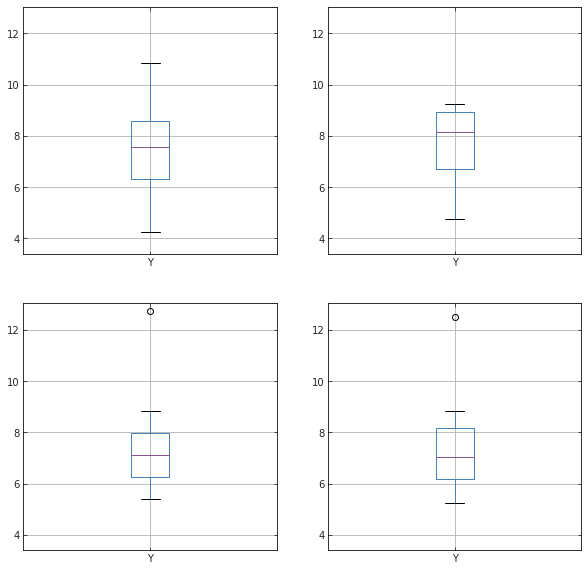

In [ ]:
fig = pl.figure(figsize=(10,10))
ax = [0]*4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
# setting y axis limits to the max and mean of each distribution
ylims = (min(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3,
         max(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3)
for i,a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    a.boxplot(column = 'Y', ax = ax[i])
    ax[i].set_ylim(ylims)
pl.show()

# hmmmm some differences are appearing. 

## lets make a histogram of the data. this is not much data but if we were looking at really large datasets histogramming rather then plotting the data directly may be necessary

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


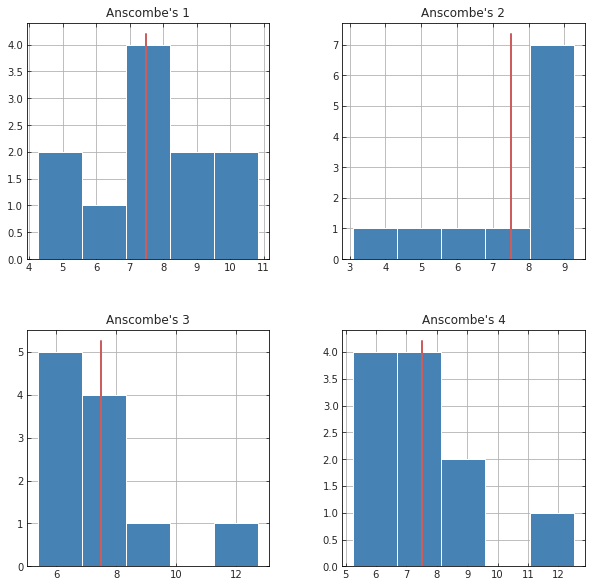

In [ ]:
fig = pl.figure(figsize = (10,10))
ax=[0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    #
    a.hist(column = 'Y', color = 'SteelBlue', bins = 5, ax = ax[i])
    ax[i].plot([a.Y.mean(), a.Y.mean()], ax[i].get_ylim(), '-', 
               color = 'IndianRed', lw = 2)
    ax[i].set_title("Anscombe's %d"%(i+1))
pl.show()

# lets plot the data itself... surprise!

3.0000909090909076 0.5000909090909093
3.0009090909090905 0.5000000000000001
3.0024545454545444 0.4997272727272729
3.001727272727269 0.49990909090909097


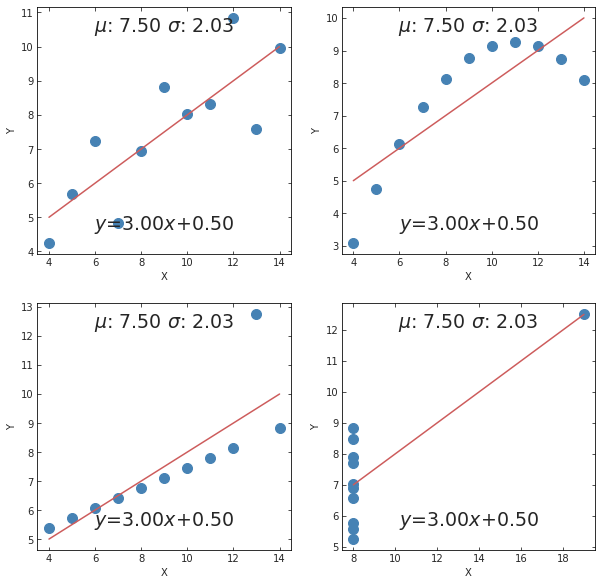

In [ ]:
fig=pl.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    xlims=ax[i].get_xlim()
    X_prime = sm.add_constant(np.linspace(a.X.min(), a.X.max(), 100))
    y_hat = lregmodels[i].predict(X_prime)
    print (*lregmodels[i].params)
    ax[i].plot(X_prime[:,1], y_hat, '-', color='IndianRed')  
    ax[i].text(0.5, 0.9, r"$\mu$: %.2f $\sigma$: %.2f"%(a.Y.mean(),
                                                        a.Y.std()), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=19)
    ax[i].text(0.5, 0.1, r"$y$={:.2f}$x$+{:.2f}".format(*lregmodels[i].params), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=19)
pl.savefig("anscombe.png")


findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


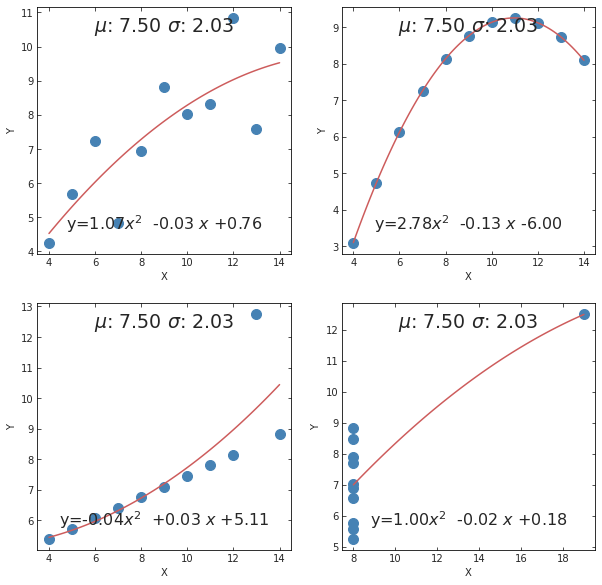

In [ ]:
fig=pl.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    xlims=ax[i].get_xlim()
    X_prime = np.linspace(a.X.min(), a.X.max(), 100)
    atmp = pd.DataFrame()
    atmp['X'] = X_prime
    atmp['X2'] = atmp['X']**2
    
    y_hat = pregmodels[i].predict(atmp)
    ax[i].plot(X_prime, y_hat, '-', color='IndianRed')  
    ax[i].text(0.5, 0.9, r"$\mu$: %.2f $\sigma$: %.2f"%(a.Y.mean(),a.Y.std()), 
               horizontalalignment="center", transform=ax[i].transAxes, fontsize=19)
    ax[i].text(0.5, 0.1, r"y={:.2f}$x^2$  {:+.2f} $x$ {:+.2f}".format(*pregmodels[i].params[::-1]), 
               horizontalalignment="center", transform=ax[i].transAxes, 
               fontsize=16)
pl.savefig("anscombe.png")


## note that the higher order moments also suggested differences

Distribution Skewness: -0.07, -1.32, 1.86, 1.51
Distribution Kurtosis: -0.53, 0.85, 4.38, 3.15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]


Text(0.5, 0.75, 'kurtosis')

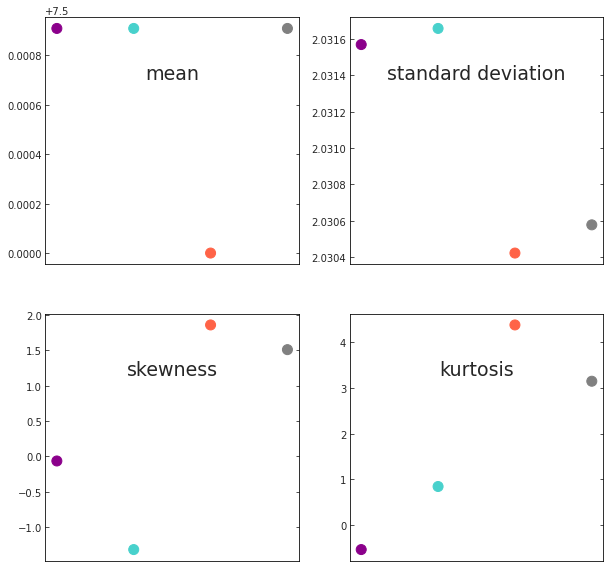

In [ ]:
print ("Distribution Skewness: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()))
print ("Distribution Kurtosis: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()))

fig = pl.figure(figsize=(10, 10))
ax = [0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
colors=['DarkMagenta', 'MediumTurquoise', 'tomato', 'gray']
for i in range(4):
    ax[i].set_xticks([],[])
ax[0].scatter(range(4), [ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()], 
              s = 100, c = colors)
ax[0].text(0.5, 0.75, 'mean', horizontalalignment = "center", 
           transform = ax[0].transAxes, fontsize = 19)
ax[1].scatter(range(4), [ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()], 
              s = 100, c = colors)
ax[1].text(0.5, 0.75, 'standard deviation', horizontalalignment = "center", 
           transform = ax[1].transAxes, fontsize = 19)
ax[2].scatter(range(4), [ansc.I.Y.skew(), ansc.II.Y.skew(), ansc.III.Y.skew(), ansc.IV.Y.skew()], 
              s = 100, c = colors)
ax[2].text(0.5, 0.75, 'skewness', horizontalalignment = "center", 
           transform = ax[2].transAxes, fontsize = 19)
ax[3].scatter(range(4), [ansc.I.Y.kurt(), ansc.II.Y.kurt(), ansc.III.Y.kurt(), ansc.IV.Y.kurt()], 
              s = 100, c = colors)
ax[3].text(0.5, 0.75, 'kurtosis', horizontalalignment = "center", 
           transform = ax[3].transAxes, fontsize = 19)


# what to the residual of the linear fit say?

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00217
Time:                        15:48:03   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

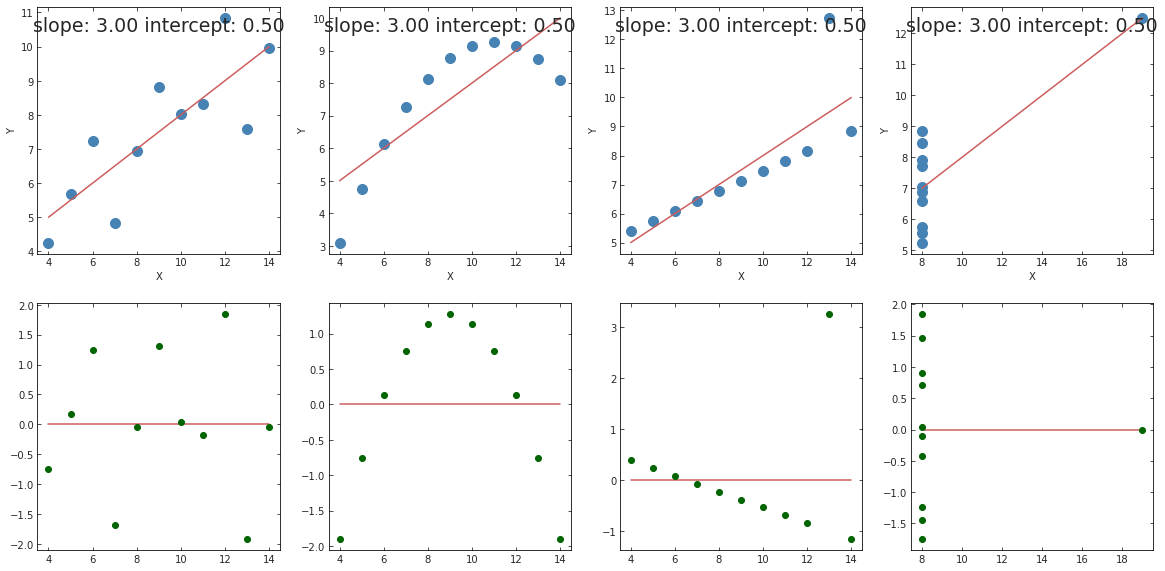

In [ ]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (lregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    X_prime = sm.add_constant(np.linspace(a.X.min(), a.X.max(), 100))
    y_hat = lregmodels[i].predict(X_prime)
    ax[i].plot(X_prime[:, 1], y_hat, '-', color = 'IndianRed')  
    ax[i].text(0.5, 0.9, r"slope: {0:.2f} intercept: {1:.2f}"\
               .format(*lregmodels[i].params.values),
        horizontalalignment="center", transform = ax[i].transAxes, 
               fontsize = 19)
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='DarkGreen')
    ax[i + 4].set_xlim(xlims)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00956
Time:                        15:48:04   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

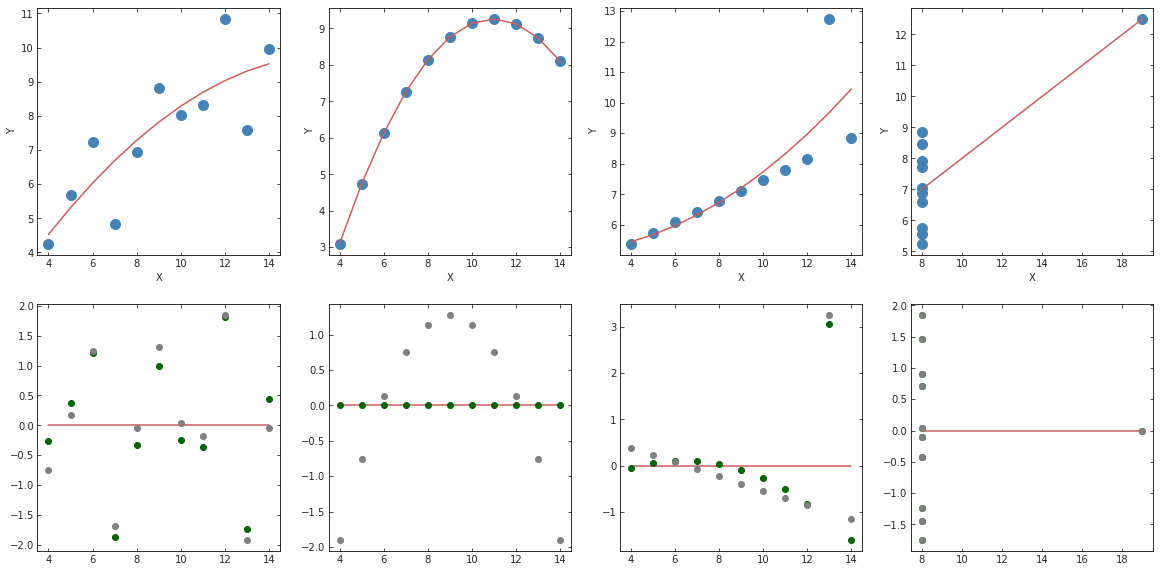

In [ ]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)


for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (pregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    
    atmp = a.sort_values(by='X', axis=0)
    atmp['X2'] = atmp['X']*atmp['X']
    y_hatp = pregmodels[i].predict(atmp)    
    ax[i].plot(atmp.X, pregmodels[i].predict(atmp), 
                   '-', color='IndianRed')
    
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(atmp.X, atmp.Y - pregmodels[i].predict(atmp), 
                   'o', color='DarkGreen')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='gray')
    ax[i + 4].set_xlim(xlims)
    

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00956
Time:                        15:48:06   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

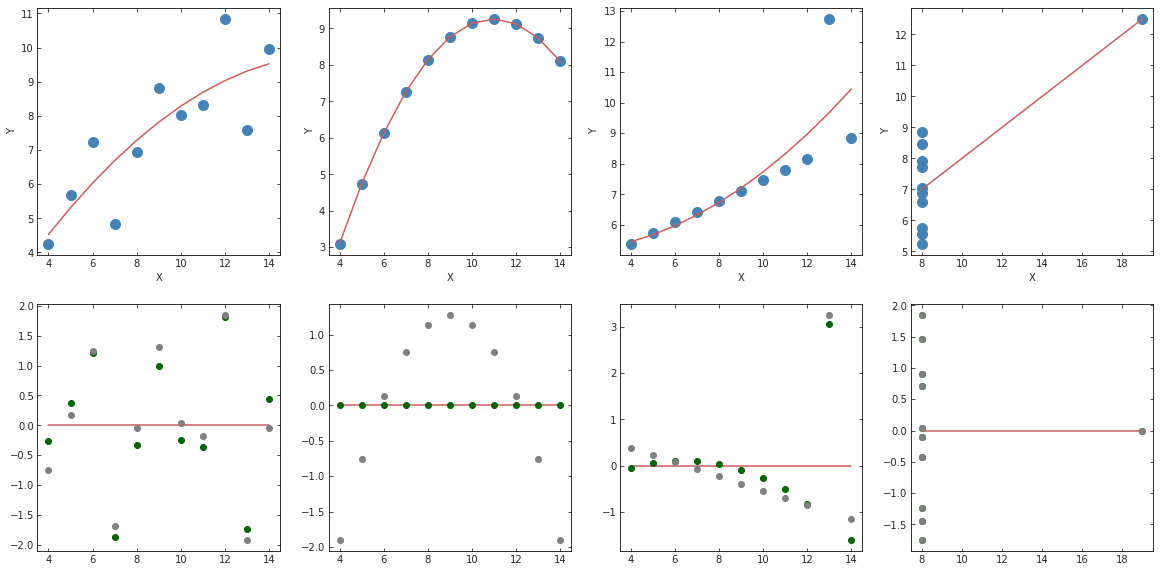

In [ ]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)


for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (pregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    
    atmp = a.sort_values(by='X', axis=0)
    atmp['X2'] = atmp['X']*atmp['X']
    y_hatp = pregmodels[i].predict(atmp)    
    ax[i].plot(atmp.X, pregmodels[i].predict(atmp), 
                   '-', color='IndianRed')
    
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(atmp.X, atmp.Y - pregmodels[i].predict(atmp), 
                   'o', color='DarkGreen')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='gray')
    ax[i + 4].set_xlim(xlims)


In [ ]:
# let's create a 10 parameter model (why 10?)

Crazyregmodels={}
for i,atmp in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #create x^2 column
    atmp['X2'] = atmp['X']*atmp['X']
    atmp['X3'] = atmp['X']*atmp['X']*atmp['X']
    atmp['X4'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X5'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X6'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X7'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X8'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X9'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    
    rm = sm.OLS(a.Y, sm.add_constant(a.X))
    Crazyregmodels[i] = smf.ols(formula='Y ~ X9 + X8 + X7 + X6 + X5 + X4 + X3 + X2 + X', data = atmp).fit()
    
    print ("polynomial regression slope {}".format(Crazyregmodels[i].params))    

polynomial regression slope Intercept    943.727422
X9             0.000061
X8            -0.004325
X7             0.130871
X6            -2.198866
X5            22.312031
X4          -138.628086
X3           503.311890
X2          -901.160728
X            259.548705
dtype: float64
polynomial regression slope Intercept   -9.413046e-01
X9           8.079207e-08
X8          -5.625955e-06
X7           1.653527e-04
X6          -2.648161e-03
X5           2.468720e-02
X4          -1.290559e-01
X3           2.853582e-01
X2           2.990793e-01
X           -6.907555e-01
dtype: float64
polynomial regression slope Intercept   -175.029261
X9            -0.000014
X8             0.000987
X7            -0.028834
X6             0.468551
X5            -4.607281
X4            27.807476
X3           -98.320239
X2           171.545488
X            -45.079295
dtype: float64
polynomial regression slope Intercept    7.200525e-14
X9          -3.703094e-08
X8           6.977391e-07
X7           1.241841e-07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
Crazyregmodels[i].summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00216
Time:                        15:48:09   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.201e-14   4.02e-15     17.903      0.000    6.29e-14    8.11e-14
X9         -3.703e-08   2.07e-09    -17.884      0.000   -4.17e-08   -3.23e-08
X8          6.977e-07    3.9e-08     17.903      0.000     6.1e-07    7.86e-07
X7          1.242e-07   6.94e-09     17.903      0.000    1.08e-07     1.4e-07
X6          1.747e-08   9.76e-10     17.903      0.000    1.53e-08    1.97e-08
X5          2.286e-09   1.28e-10     17.903      0.000       2e-09    2.57e-09
X4          2.911e-10   1.63e-11     17.903      0.000    2.54e-10    3.28e-10
X3          3.668e-11   2.05e-12     17.903      0.000     3.2e-11    4.13e-11
X2          4.599e-12   2.57e-13     17.903      0.000    4.02e-12    5.18e-12
X           5.757e-13   3.22e-14     17.903      0.000    5.03e-13    6.48e-13
==============================================================================
Omnibus:                        0.555   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.524
Skew:                           0.010   Prob(JB):                        0.769
Kurtosis:                       1.931   Cond. No.                     1.80e+57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.22e-92. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00956
Time:                        15:48:10   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.8

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 24 Oct 2021   Prob (F-statistic):            0.00216
Time:                        15:48:11   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1780      0.017     10.661      0.0

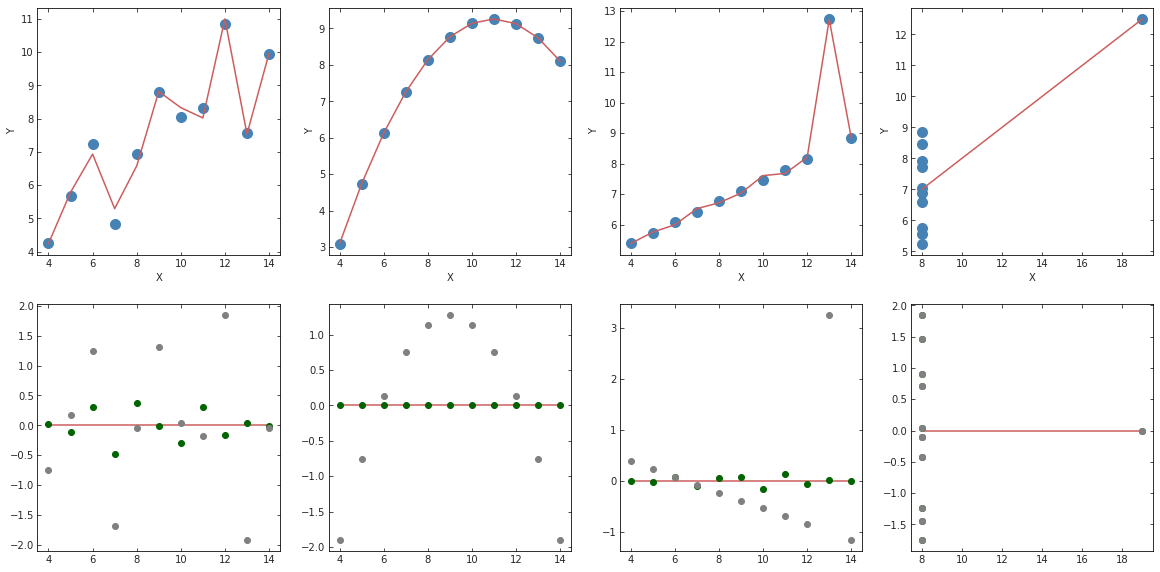

In [ ]:
fig = pl.figure(figsize = (20, 10))
ax=[0] * 8

ax[0] = fig.add_subplot(241)
ax[1] = fig.add_subplot(242)
ax[2] = fig.add_subplot(243)
ax[3] = fig.add_subplot(244)
ax[4] = fig.add_subplot(245)
ax[5] = fig.add_subplot(246)
ax[6] = fig.add_subplot(247)
ax[7] = fig.add_subplot(248)


for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    print (pregmodels[i].summary())
    a.plot(kind = 'scatter', s = 100, x = 'X', y = 'Y', 
           color = 'SteelBlue', ax = ax[i])
    xlims = ax[i].get_xlim()

    
    atmp = a.sort_values(by='X', axis=0)
    atmp['X2'] = atmp['X']*atmp['X']
    atmp['X3'] = atmp['X']*atmp['X']*atmp['X']
    atmp['X4'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X5'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X6'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X7'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X8'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X9'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    atmp['X10'] = atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']*atmp['X']
    y_hatp = Crazyregmodels[i].predict(atmp)    
    ax[i].plot(atmp.X, Crazyregmodels[i].predict(atmp), 
                   '-', color='IndianRed')
    
    ax[i + 4].plot([a.X.min(), a.X.max()], [0, 0], '-', 
                   color = 'IndianRed')
    ax[i + 4].plot(atmp.X, atmp.Y - Crazyregmodels[i].predict(atmp), 
                   'o', color='DarkGreen')
    ax[i + 4].plot(a.X, a.Y - lregmodels[i].predict(sm.add_constant(a.X)), 
                                                   'o', color='gray')
    ax[i + 4].set_xlim(xlims)


# Figure: increasing the number of parameters in the model gives a progressively better fit, but not a better model!